## This is my kaggle work so importing is different here
In this data i merged MLP and CNN lets see how it worked.

### Importing and Data Processing

In [2]:
import os

train_path = "../input/cat-and-dog/training_set/training_set/"
test_path = "../input/cat-and-dog/test_set/test_set/"

print(os.listdir(train_path))
print(os.listdir(test_path))

['dogs', 'cats']
['dogs', 'cats']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255, zoom_range = 0.2,
                               rotation_range=40, horizontal_flip= True)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(train_path, target_size=(224,224),
                                      batch_size=32, class_mode = "binary")

test = test_gen.flow_from_directory(test_path, target_size=(224,224),
                                      batch_size=32, class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Building and merging both MLP and CNN.

In [4]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

model.add(Conv2D(32, (3,3), padding="SAME", activation="relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="SAME", activation="relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="SAME", activation="relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding="SAME", activation="relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(Adam(lr=0.001), loss = "binary_crossentropy", metrics="accuracy")

Epoch 1/50
251/251 [==============================] - 174s 679ms/step - loss: 0.7014 - accuracy: 0.5124 - val_loss: 0.6526 - val_accuracy: 0.5877
Epoch 2/50
251/251 [==============================] - 109s 434ms/step - loss: 0.6624 - accuracy: 0.5812 - val_loss: 0.5922 - val_accuracy: 0.6876
Epoch 3/50
251/251 [==============================] - 109s 433ms/step - loss: 0.6159 - accuracy: 0.6608 - val_loss: 0.5639 - val_accuracy: 0.7242
Epoch 4/50
251/251 [==============================] - 109s 434ms/step - loss: 0.5544 - accuracy: 0.7113 - val_loss: 0.5482 - val_accuracy: 0.7113
Epoch 5/50
251/251 [==============================] - 108s 431ms/step - loss: 0.5295 - accuracy: 0.7380 - val_loss: 0.5011 - val_accuracy: 0.7469
Epoch 6/50
251/251 [==============================] - 115s 458ms/step - loss: 0.5000 - accuracy: 0.7560 - val_loss: 0.4979 - val_accuracy: 0.7642
Epoch 7/50
251/251 [==============================] - 109s 435ms/step - loss: 0.4678 - accuracy: 0.7776 - val_loss: 0.4579 -

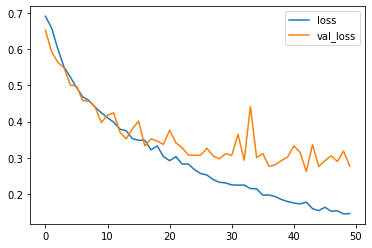

In [5]:
# Training
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor = "val_loss", patience = 2)

model.fit(train, epochs=50, validation_data=test, callbacks=[early])

As you can see difference between loss and val_loss is getting higher it is because i setted patience to 20 but
if i changed it to 5 and reduce the layers it will fix that difference.

In [6]:
# Making single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../input/cat-and-dog/test_set/test_set/dogs/dog.4004.jpg", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
